### Capstone project notebook

In [1]:
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import folium 

from geopy.geocoders import Nominatim 
    
from pandas.io.json import json_normalize

print('Libraries imported.')

Libraries imported.


In [3]:
CLIENT_ID = 'VMX2TMOEWR3CY5OJE4IAVQ5VTUIZSWBOSBEPMH3BYE24JFDA' # your Foursquare ID
CLIENT_SECRET = 'VSOJEBUALJNGTNMIRUKLAYYSJCZG5LHS2QIEF0YJO435HEL4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500

# Acquiring Hospital Data

In [4]:
search_query = 'Hospital'
radius = 50000
print(search_query + ' .... OK!')

latitude = 51.5074
longitude = 0.1277

Hospital .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc8966d2aa0530e5aa640b9'},
 'response': {'venues': [{'id': '4b4e1c8af964a5209ce126e3',
    'name': "Guy's Hospital",
    'location': {'address': 'Great Maze Pond',
     'crossStreet': 'St. Thomas St',
     'lat': 51.50352551239466,
     'lng': -0.0867319107055664,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.50352551239466,
       'lng': -0.0867319107055664}],
     'distance': 14864,
     'postalCode': 'SE1 9RT',
     'cc': 'GB',
     'city': 'London',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['Great Maze Pond (St. Thomas St)',
      'London',
      'Greater London',
      'SE1 9RT',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}]

In [6]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b4e1c8af964a5209ce126e3,Guy's Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1606981230,False,Great Maze Pond,St. Thomas St,51.503526,-0.086732,"[{'label': 'display', 'lat': 51.50352551239466...",14864,SE1 9RT,GB,London,Greater London,United Kingdom,"[Great Maze Pond (St. Thomas St), London, Grea...",NaN,NaN
1,4bfe353af7c82d7f8a438f04,Queen Elizabeth Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1606981230,False,Stadium Rd.,NaN,51.478861,0.050717,"[{'label': 'display', 'lat': 51.47886089765733...",6209,SE18 4QH,GB,Greenwich,Greater London,United Kingdom,"[Stadium Rd., Greenwich, Greater London, SE18 ...",NaN,NaN
2,4bf3a32b706e20a1976ca898,King's College Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1606981230,False,Denmark Hill,NaN,51.468150,-0.093016,"[{'label': 'display', 'lat': 51.46814989580254...",15910,SE5 9RS,GB,Camberwell,Greater London,United Kingdom,"[Denmark Hill, Camberwell, Greater London, SE5...",600424239,NaN
3,4ac518f6f964a5205eaf20e3,St Thomas' Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1606981230,False,Westminster Bridge Rd,NaN,51.499710,-0.118904,"[{'label': 'display', 'lat': 51.49971047720161...",17109,SE1 7EH,GB,London,Greater London,United Kingdom,"[Westminster Bridge Rd, London, Greater London...",NaN,NaN
4,4be47840910020a1e0c2d114,Queen Mary's Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1606981230,False,Frognal Ave,NaN,51.419561,0.101549,"[{'label': 'display', 'lat': 51.41956136232628...",9944,DA14 6LT,GB,Sidcup,Greater London,United Kingdom,"[Frognal Ave, Sidcup, Greater London, DA14 6LT...",NaN,"Sidcup, London, Greater London"


In [7]:
hospital_df = dataframe[['name', 'location.lat', 'location.lng', 'location.city' ]]

In [8]:
hospital_df = hospital_df.rename(columns={'name':'Name','location.lat':'Lat', 'location.lng':'Lon', 'location.city':'City'})

In [9]:
hospital_df = hospital_df.loc[hospital_df['City']=='London']

In [10]:
hospital_df.head()

,Name,Lat,Lon,City
0,Guy's Hospital,51.503526,-0.086732,London
3,St Thomas' Hospital,51.499710,-0.118904,London
7,St Bartholomew's Hospital,51.517863,-0.099607,London
9,The Hospital of St John & St Elizabeth,51.532949,-0.174645,London
13,Homerton University Hospital,51.550134,-0.045918,London


In [11]:
hospital_df.shape

(21, 4)

In [ ]:
m = folium.Map(tiles = 'Stamen Terrain' ,location=[latitude, longitude], zoom_start = 11)

for lat, lng in zip(hospital_df.Lat, hospital_df.Lon):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(m)
m

# Shape File of London

In [12]:
gdf = gpd.read_file(r'C:\Users\J.D\Desktop\Project\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp')

In [13]:
gdf = gdf [['NAME', 'HECTARES','geometry']]

In [14]:
gdf.rename(columns={'NAME':'Name', 'HECTARES':'Area'}, inplace=True)

In [15]:
gdf.head()

,Name,Area,geometry
0,Kingston upon Thames,3726.117,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,8649.441,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,15013.487,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,5658.541,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,5554.428,"POLYGON ((510253.500 182881.600, 510249.900 18..."


# Getting population data

In [16]:
url = 'https://www.citypopulation.de/en/uk/greaterlondon/'
parts = requests.get(url).content
df_html = pd.read_html(parts)

In [17]:
pop_df = df_html[0]

In [18]:
pop_df.head()

,Name,Status,PopulationEstimate1981-06-30,PopulationEstimate1991-06-30,PopulationEstimate2001-06-30,PopulationEstimate2011-06-30,PopulationEstimate2019-06-30,Unnamed: 7
0,Barking and Dagenham,Borough,161300,155500,165700,187029,212906,→
1,Barnet,Borough,295200,297700,319500,357538,395869,→
2,Bexley,Borough,217400,218100,218800,232774,248287,→
3,Brent,Borough,248300,240800,269600,312245,329771,→
4,Bromley,Borough,299200,293500,296200,310554,332336,→


In [19]:
pop_df = pop_df[['Name', 'PopulationEstimate2019-06-30']]

In [20]:
pop_df = pop_df.rename(columns={'PopulationEstimate2019-06-30':'Population'})

In [21]:
print('The number of boroughs in population dataset is ',pop_df.shape)
print('The number of boroughs in shape file is ', gdf.shape)

The number of boroughs in population dataset is  (34, 2)
The number of boroughs in shape file is  (33, 3)


In [22]:
for index,row in pop_df['Name'].iteritems():
    if row in gdf['Name'].tolist():
        pass
    else:
        print('This borough is not in the list '+row)
        

This borough is not in the list City of Westminster
This borough is not in the list Greater London


In [23]:
pop_df.at[7, 'Name'] = 'Westminster'

In [24]:
pop_df.drop(pop_df.index[33], inplace=True)

In [25]:
gdf['Area'] = gdf['Area']/100 

In [26]:
gdf = gdf.merge(right=pop_df, on='Name')

In [27]:
gdf['Pop_Density'] = gdf['Population']/gdf['Area']

In [28]:
gdf.head()

,Name,Area,geometry,Population,Pop_Density
0,Kingston upon Thames,37.26117,"POLYGON ((516401.600 160201.800, 516407.300 16...",177507,4763.860072
1,Croydon,86.49441,"POLYGON ((535009.200 159504.700, 535005.500 15...",386710,4470.924768
2,Bromley,150.13487,"POLYGON ((540373.600 157530.400, 540361.200 15...",332336,2213.583027
3,Hounslow,56.58541,"POLYGON ((521975.800 178100.000, 521967.700 17...",271523,4798.463067
4,Ealing,55.54428,"POLYGON ((510253.500 182881.600, 510249.900 18...",341806,6153.756967


In [29]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

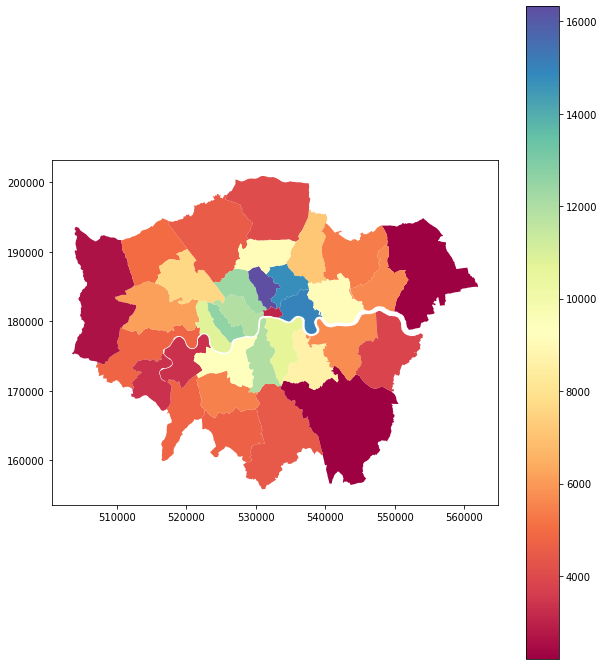

In [36]:
gdf.plot(column='Pop_Density', figsize=(10,12), cmap='Spectral', legend=True)

m = folium.Map(tiles = 'Stamen Terrain' ,location=[latitude, longitude], zoom_start = 11,
              width=800, height=500)

for lat, lng in zip(hospital_df.Lat, hospital_df.Lon):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(m)
m